<img src="https://www.cqf.com/themes/custom/creode/logo.svg" data-align="left" style="vertical-align: top; padding-top: 23px;" style="width:10.0%" />
<img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg" data-align="right" style="vertical-align: middle;" style="width:12.0%" />

Python Labs

Value At Risk

**Kannan Singaravelu**

kannan.singaravelu@fitchlearning.com

## Value-at-Risk<a href="#Value-at-Risk" class="anchor-link">¶</a>

Value at Risk - **VaR** - is one of the most important metrics that is
used to measures the risk associated with a financial position or a
portfolio of financial instruments. VaR can be defined as the maximum
loss with a confidence level over a predetermined period. Let's say that
the 1-day 95% VaR of our portfolio is \$\\\$100\$. This means that 95%
of the time, it is expected that - under normal market conditions - we
will not lose more than \$100 by holding our portfolio over one day.

Three approaches that are commonly used in the industry are

-   **Parametric**
-   **Historical Simulation**
-   **Monte Carlo Simulation**

### Import Libraries<a href="#Import-Libraries" class="anchor-link">¶</a>

In \[1\]:

    import pandas as pd
    import numpy as np
    from numpy.linalg import multi_dot

    from scipy.stats import norm
    from tabulate import tabulate

    import matplotlib.pyplot as plt

### Retrieve Data<a href="#Retrieve-Data" class="anchor-link">¶</a>

We will use the FAANG stocks as before to build for calculation of VaR

In \[2\]:

    # Load locally stored data
    df = pd.read_csv('data/faang_stocks.csv', parse_dates=True, index_col=0)['2013':]

    # Check first 5 values 
    df.head()

Out\[2\]:

|            | AAPL      | AMZN       | FB        | GOOG       | NFLX      |
|------------|-----------|------------|-----------|------------|-----------|
| Date       |           |            |           |            |           |
| 2013-01-02 | 68.502106 | 257.309998 | 28.000000 | 360.274597 | 13.144286 |
| 2013-01-03 | 67.637436 | 258.480011 | 27.770000 | 360.483826 | 13.798572 |
| 2013-01-04 | 65.753418 | 259.149994 | 28.760000 | 367.607117 | 13.711429 |
| 2013-01-07 | 65.366646 | 268.459991 | 29.420000 | 366.003143 | 14.171429 |
| 2013-01-08 | 65.542587 | 266.380005 | 29.059999 | 365.280823 | 13.880000 |

### Calculate Returns<a href="#Calculate-Returns" class="anchor-link">¶</a>

In \[3\]:

    # Calculate daily returns
    returns = df.pct_change().dropna()

In \[4\]:

    # Visualize AMZN daily returns
    plt.plot(returns['AMZN'], color='orange')
    plt.axhline(y=0.10, ls='dotted', color='black')
    plt.axhline(y=-0.10, ls='dotted', color='black')
    plt.title('AMZN Daily Returns')
    plt.grid(True)

![](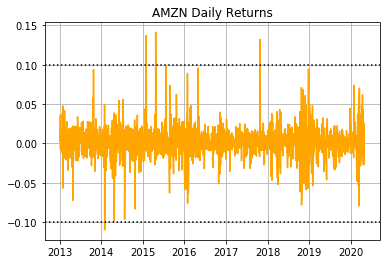%0A)

### Parametric VaR<a href="#Parametric-VaR" class="anchor-link">¶</a>

The Variance-covariance is a parametric method which assumes (almost
always) that the returns are normally distributed. In this method, we
first calculate the mean and standard deviation of the returns to derive
the risk metric. Based on the assumption of normality, we can
generalise,  
  
\$\$ VaR = position \* (\\mu - z \* \\sigma) \$\$

| Confidence Level | Value At Risk                      |
|:-----------------|:-----------------------------------|
| `90%`            | \$\\mu\$ - \$1.29\$ \* \$\\sigma\$ |
| `95%`            | \$\\mu\$ - \$1.64\$ \* \$\\sigma\$ |
| `99%`            | \$\\mu\$ - \$2.33\$ \* \$\\sigma\$ |

where, \$\\mu\$ is the return, \$\\sigma\$ is the volatility and \$z\$
is the number of standard deviation from the mean.

In \[5\]:

    # Calculate mean and standard deviation 
    mean = np.mean(returns['AMZN'])
    stdev = np.std(returns['AMZN'])

    # Calculate VaR at difference confidence level
    VaR_90 = norm.ppf(1-0.90,mean,stdev)
    VaR_95 = norm.ppf(1-0.95,mean,stdev) #norm.ppf(0.05)
    VaR_99 = norm.ppf(1-0.99,mean,stdev)

In \[6\]:

    # Ouput results in tabular format
    table = [['90%', VaR_90],['95%', VaR_95],['99%', VaR_99] ]
    header = ['Confidence Level', 'Value At Risk']
    print(tabulate(table,headers=header))

    Confidence Level      Value At Risk
    ------------------  ---------------
    90%                      -0.0230125
    95%                      -0.0299292
    99%                      -0.0429039

Lets now define a VaR function so that we can use it calculate it for
individual stocks

In \[7\]:

    # VaR function
    def VaR(symbol, cl=0.95):
        mean = np.mean(returns[symbol])
        stdev = np.std(returns[symbol])
        
        return np.around(100*norm.ppf(1-cl,mean,stdev),4)

In \[8\]:

    # VaR for stocks
    print('VaR for FAANG Stocks')
    print('---'*11)
    [print(f'VaR at 95% CL for {stock:4} : {VaR(stock)}%') for stock in df.columns][0]

    VaR for FAANG Stocks
    ---------------------------------
    VaR at 95% CL for AAPL : -2.7758%
    VaR at 95% CL for AMZN : -2.9929%
    VaR at 95% CL for FB   : -3.4005%
    VaR at 95% CL for GOOG : -2.5582%
    VaR at 95% CL for NFLX : -4.5729%

In \[9\]:

    # Visualize VaR at 95% confidence level

![](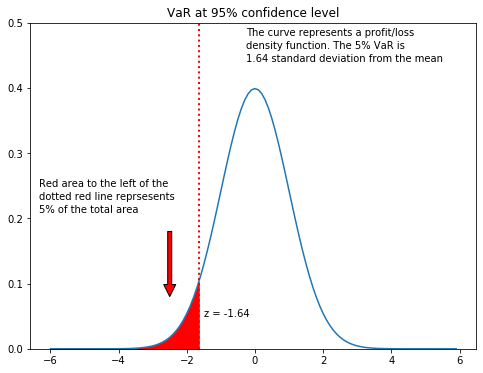%0A)

Now, let's assume that we have 1,000 shares of AMZN's stock on April 29,
2020. What is the maximum loss next day with a confidence level of 99%?

In \[10\]:

    num_of_shares = 1000
    price = df['AMZN'].iloc[-1]
    position = num_of_shares * price 

    amzn_var = position * VaR_99

    print(f'Amazon Holding Value: {position}')
    print(f'Amazon VaR at 99% confidence level is: {amzn_var}')

    Amazon Holding Value: 2372709.9609375
    Amazon VaR at 99% confidence level is: -101798.41813580536

VaR can also be calculated using the above formula at 99% confidence
level.

In \[11\]:

    # VaR calculation by appling direct formulae
    position * (mean + norm.ppf(1-0.99) * stdev)         # mean-2.33*stdev

Out\[11\]:

    -101798.41813580536

### Scaling VaR<a href="#Scaling-VaR" class="anchor-link">¶</a>

Now, let's calculate VaR over a 5-day period. To scale it, multiply by
square root of time.  
  
\$\$ VaR = position \* (\\mu - z \* \\sigma) \* \\sqrt{T}\$\$

where, \$T\$ is the horizon or forecast period.

In \[12\]:

    forecast_days = 5
    f_VaR_90 = VaR_90*np.sqrt(forecast_days)
    f_VaR_95 = VaR_95*np.sqrt(forecast_days)
    f_VaR_99 = VaR_99*np.sqrt(forecast_days)

In \[13\]:

    ftable = [['90%', f_VaR_90],['95%', f_VaR_95],['99%', f_VaR_99] ]
    fheader = ['Confidence Level', '5-Day Forecast Value At Risk']
    print(tabulate(ftable,headers=fheader))

    Confidence Level      5-Day Forecast Value At Risk
    ------------------  ------------------------------
    90%                                     -0.0514574
    95%                                     -0.0669237
    99%                                     -0.0959359

Let's now calculate AMZN VaR over a 5-day period with a confidence level
of 99%

In \[14\]:

    amzn_var_5days = position * f_VaR_99

    print(f'Amazon Holding Value: {position}')
    print(f'Amazon VaR at 99% confidence level is: {amzn_var_5days}')

    Amazon Holding Value: 2372709.9609375
    Amazon VaR at 99% confidence level is: -227628.1829536082

In \[15\]:

    # Scaled VaR over different time horizon
    plt.figure(figsize=(8,6))
    plt.plot(range(100),[-100*VaR_95*np.sqrt(x) for x in range(100)])
    plt.xlabel('Horizon')
    plt.ylabel('Var 95 (%)')
    plt.title('VaR_95 Scaled by Time');

![](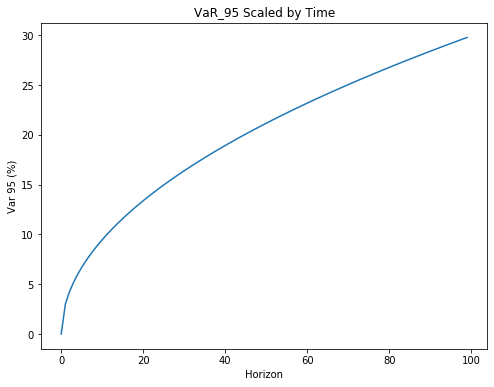%0A)

### Historical VaR<a href="#Historical-VaR" class="anchor-link">¶</a>

Asset returns do not necessarily follow a normal distribution. An
alternative is to use sorted returns to evaluate a VaR. This method uses
historical data where returns are sorted in ascending order to calculate
maximum possible loss for a given confidence level.

In \[16\]:

    # Use quantile function for Historical VaR
    hVaR_90 = returns['AMZN'].quantile(0.10)
    hVaR_95 = returns['AMZN'].quantile(0.05)
    hVaR_99 = returns['AMZN'].quantile(0.01)

In \[17\]:

    htable = [['90%', hVaR_90],['95%', hVaR_95],['99%', hVaR_99]]
    print(tabulate(htable,headers=header))

    Confidence Level      Value At Risk
    ------------------  ---------------
    90%                      -0.0176864
    95%                      -0.0270757
    99%                      -0.0537678

### Expected Short Fall<a href="#Expected-Short-Fall" class="anchor-link">¶</a>

VaR is a reasonable measure of risk if assumption of normality holds.
Else, we might underestimate the risk if we observe a fat tail or
overestimate the risk if tail is thinner. Expected shortfall or
Conditional Value at Risk - **CVaR** - is an estimate of expected
shortfall sustained in the worst 1 - x% of scenarios. It is defined as
the average loss based on the returns that are lower than the VaR
threshold. Assume that we have *`n`* return observations, then the
expected shortfall is  
  
\$\$ CVaR = \\frac 1 n \* \\sum\_{i=1}^{n} R_i\[R \\leq hVaR\_{cl}\]\$\$

where, \$R\$ is returns, \$hVaR\$ is historical VaR and \$cl\$ is the
confidence level.

In \[18\]:

    # Calculate CVar
    CVaR_90 = returns['AMZN'][returns['AMZN']<=hVaR_90].mean()
    CVaR_95 = returns['AMZN'][returns['AMZN']<=hVaR_95].mean()
    CVaR_99 = returns['AMZN'][returns['AMZN']<=hVaR_99].mean()

In \[19\]:

    ctable = [['90%', CVaR_90],['95%', CVaR_95],['99%', CVaR_99] ]
    cheader = ['Confidence Level', 'Conditional Value At Risk']
    print(tabulate(ctable,headers=cheader))

    Confidence Level      Conditional Value At Risk
    ------------------  ---------------------------
    90%                                  -0.0322919
    95%                                  -0.0430837
    99%                                  -0.0709137

### MonteCarlo VaR<a href="#MonteCarlo-VaR" class="anchor-link">¶</a>

The Monte Carlo simulation approach has a number of similarities to
historical simulation. It allows us to use actual historical
distributions rather than having to assume normal returns. As returns
are assumed to follow a normal distribution, we could generate *`n`*
simulated returns with the same mean and standard deviation (derived
from the daily returns) and then sorted in ascending order to calculate
maximum possible loss for a given confidence level.

In \[20\]:

    # Set seed for reproducibility
    np.random.seed(12345)

    # Number of simulations
    n_sims = 5000

    # Simulate returns and sort
    sim_returns = np.random.normal(mean, stdev, n_sims)

    # Use percentile function for MCVaR
    MCVaR_90 = np.percentile(sim_returns,10)
    MCVaR_95 = np.percentile(sim_returns, 5)
    MCVaR_99 = np.percentile(sim_returns,1)

In \[21\]:

    mctable = [['90%', MCVaR_90],['95%', MCVaR_95],['99%', MCVaR_99]]
    print(tabulate(mctable,headers=header))

    Confidence Level      Value At Risk
    ------------------  ---------------
    90%                      -0.022716
    95%                      -0.0296045
    99%                      -0.0419563

## Portfolio VaR<a href="#Portfolio-VaR" class="anchor-link">¶</a>

If we know the returns and volatilities of all the assets in the
portfolio, we can calculate the VaR for the whole portfolio. We will now
derive VaR of an equal weighted portfolio of FAANG stocks.

### Assign Weights<a href="#Assign-Weights" class="anchor-link">¶</a>

In \[22\]:

    wts = np.array([0.2,0.2,0.2,0.2,0.2])[:,np.newaxis]
    wts

Out\[22\]:

    array([[0.2],
           [0.2],
           [0.2],
           [0.2],
           [0.2]])

### Portfolio return<a href="#Portfolio-return" class="anchor-link">¶</a>

In \[23\]:

    # Stock returns
    returns[:5]

Out\[23\]:

|            | AAPL      | AMZN      | FB        | GOOG      | NFLX      |
|------------|-----------|-----------|-----------|-----------|-----------|
| Date       |           |           |           |           |           |
| 2013-01-03 | -0.012623 | 0.004547  | -0.008214 | 0.000581  | 0.049777  |
| 2013-01-04 | -0.027855 | 0.002592  | 0.035650  | 0.019760  | -0.006315 |
| 2013-01-07 | -0.005882 | 0.035925  | 0.022949  | -0.004363 | 0.033549  |
| 2013-01-08 | 0.002692  | -0.007748 | -0.012237 | -0.001974 | -0.020565 |
| 2013-01-09 | -0.015629 | -0.000113 | 0.052650  | 0.006573  | -0.012865 |

In \[24\]:

    port_ret = np.dot(returns,wts)
    port_ret.flatten()

Out\[24\]:

    array([ 0.00681364,  0.00476646,  0.01643538, ..., -0.00763758,
           -0.02829639,  0.04543993])

In \[25\]:

    port_mean = port_ret.mean()
    port_mean

Out\[25\]:

    0.0013435993118931643

### Portfolio Volatility<a href="#Portfolio-Volatility" class="anchor-link">¶</a>

In \[26\]:

    # Covariance matrix
    returns.cov()

Out\[26\]:

|      | AAPL     | AMZN     | FB       | GOOG     | NFLX     |
|------|----------|----------|----------|----------|----------|
| AAPL | 0.000304 | 0.000140 | 0.000160 | 0.000148 | 0.000126 |
| AMZN | 0.000140 | 0.000363 | 0.000205 | 0.000185 | 0.000243 |
| FB   | 0.000160 | 0.000205 | 0.000460 | 0.000192 | 0.000215 |
| GOOG | 0.000148 | 0.000185 | 0.000192 | 0.000258 | 0.000195 |
| NFLX | 0.000126 | 0.000243 | 0.000215 | 0.000195 | 0.000852 |

In \[27\]:

    # Portfolio volatility
    port_stdev = np.sqrt(multi_dot([wts.T, returns.cov(), wts]))
    port_stdev.flatten()[0]

Out\[27\]:

    0.015303544566859555

### Portfolio Position<a href="#Portfolio-Position" class="anchor-link">¶</a>

In \[28\]:

    # Portfolio Position
    port_pos = (df.iloc[-1] * num_of_shares).sum()
    port_pos

Out\[28\]:

    4607223.205566406

In \[29\]:

    # Calculate Portfolio VaR at difference confidence level
    pVaR_90 = norm.ppf(1-0.90,port_mean,port_stdev).flatten()[0]
    pVaR_95 = norm.ppf(1-0.95,port_mean,port_stdev).flatten()[0]
    pVaR_99 = norm.ppf(1-0.99,port_mean,port_stdev).flatten()[0]

In \[30\]:

    pVaR_95

Out\[30\]:

    -0.02382849147411927

### Portfolio VaR<a href="#Portfolio-VaR" class="anchor-link">¶</a>

In \[31\]:

    # Ouput results in tabular format
    ptable = [['90%', pVaR_90],['95%', pVaR_95],['99%', pVaR_99]]
    header = ['Confidence Level', 'Value At Risk']
    print(tabulate(ptable,headers=header))

    Confidence Level      Value At Risk
    ------------------  ---------------
    90%                      -0.0182687
    95%                      -0.0238285
    99%                      -0.0342578

Let's now compare the portfolio VaR numbers with that of the individual
stocks

In \[32\]:

    # Iterate over symbols
    for stock in df.columns:
        pos = df[stock].iloc[-1] * num_of_shares
        pvar = pos * VaR(stock)
        
        print(f'{stock} Holding Value: {pos:0.4}') 
        print(f'{stock} VaR at 95% confidence level: {pvar:0.4}')
        print()

    print(f'Portfolio Holding Value: {port_pos:0.4}')
    print(f'Portoflio VaR at 95% confidence level: {port_pos * pVaR_95:0.4}')

    AAPL Holding Value: 2.87e+05
    AAPL VaR at 95% confidence level: -7.965e+05

    AMZN Holding Value: 2.373e+06
    AMZN VaR at 95% confidence level: -7.101e+06

    FB Holding Value: 1.942e+05
    FB VaR at 95% confidence level: -6.603e+05

    GOOG Holding Value: 1.341e+06
    GOOG VaR at 95% confidence level: -3.432e+06

    NFLX Holding Value: 4.119e+05
    NFLX VaR at 95% confidence level: -1.884e+06

    Portfolio Holding Value: 4.607e+06
    Portoflio VaR at 95% confidence level: -1.098e+05

The VaR for the current portfolio of \$\\\$ 4.6\$ million is
\\\$109,356, which is much lesser than the individual VaR numbers. This
signifies the effect of diversification by selecting different stocks.

# References<a href="#References" class="anchor-link">¶</a>

-   Numpy documentation <https://docs.scipy.org/doc/numpy/>

-   Scipy documentation <https://docs.scipy.org/doc/scipy/reference/>

-   Paul Wilmott (2007), Paul Wilmott introduces Quantitative Finance